<h1 style='color:brown;'>---------------Language translation using Deep learning LSTM's----------------</h1>

<h1>Table of contents</h1>

<a href='#intro' style="text-decoration:none;color:purple;">1) Intro to Seq2Seq models </a>

<a href='#trad' style="text-decoration:none;color:purple;">2) Traditional phrase based statistical translation model</a>

<a href='#arch' style="text-decoration:none;color:purple;">3) Architecture of Sequence to Sequence model </a>

<a href='#keras' style="text-decoration:none;color:purple;">4) Keras and tensorflow support</a>

<a href='#other' style="text-decoration:none;color:purple;">5) Other methods for machine translation</a>

<a href='#data' style="text-decoration:none;color:purple;">6) Datasets available for language translation</a>

<a href='#code' style="text-decoration:none;color:purple;">7) Code snippet in keras </a>

<a href='#transfer' style="text-decoration:none;color:purple;">8) Transfer learning for machine translation</a>

<a href='#metric' style="text-decoration:none;color:purple;">9) Evaluation metrics and loss function</a>

<a id='intro'></a>

## 1) Intro to Seq2Seq models for language translation

### Sequence-to-sequence (seq2seq) models have enjoyed great success in a variety of tasks such as machine translation, speech recognition, and text summarization.
Use of Seq2Seq models in language translation: Converting english text to french language:
    ### "the cat sat on the mat" -> [Seq2Seq model] -> "le chat etait assis sur le tapis"
    
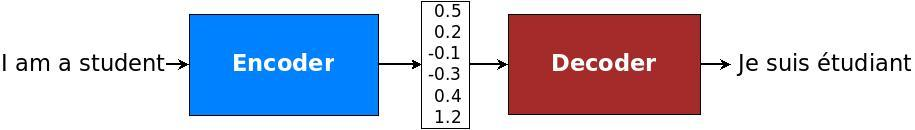

Encoder-decoder architecture – example of a general approach for NMT. An encoder converts a source sentence into a "meaning" vector which is passed through a decoder to produce a translation.

<a id='trad'></a>

## 2) Traditional method Phrase based translation A.K.A Statistical machine translation

For more check out:
https://en.wikipedia.org/wiki/Statistical_machine_translation

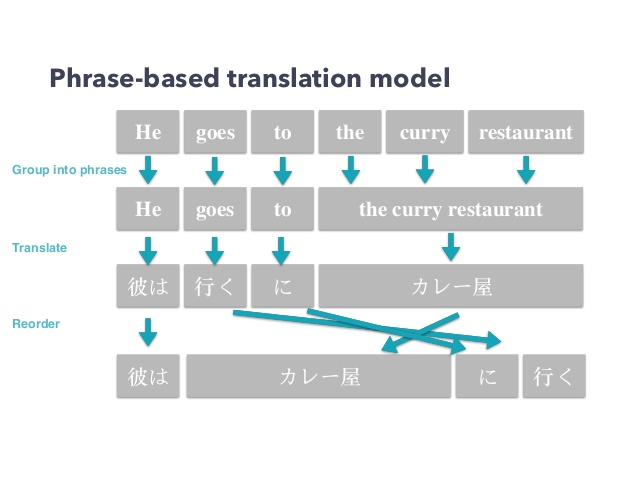

<h3>Back in the old days, traditional phrase-based translation systems performed their task by breaking up source sentences into multiple chunks and then translated them phrase-by-phrase. This led to disfluency in the translation outputs and was not quite like how we, humans, translate. We read the entire source sentence, understand its meaning, and then produce a translation. Neural Machine Translation (NMT) mimics that!</h3>

<a id='arch'></a>

## 3) Architecture of Seq2Seq model:

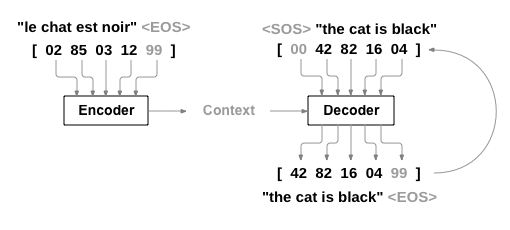

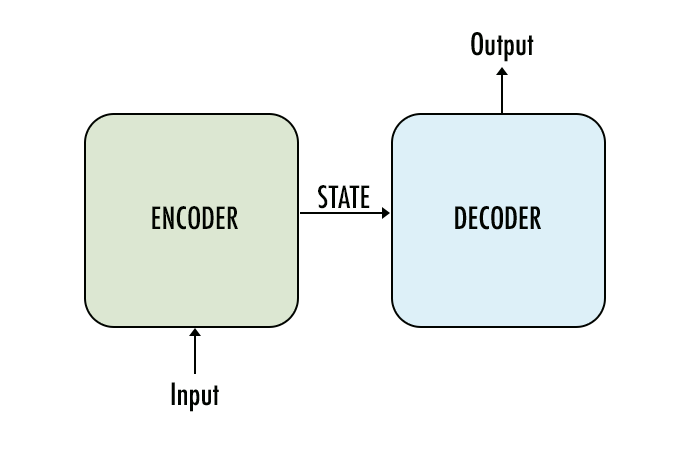

Above is the basic architecture of Seq2Seq model which has an:

1) Encoder which converts input(Source language sentence) into meaning vector(Context).

2) Note that here output of encoder is discarded, but returns the internal state as a context to decoder.

3) Then decoder translates the Source language to target language by predicting the next output in a sequential manner.

<a id='keras'></a>

## 4) Keras and tensorflow support for seq2seq models

Seq2Seq models can be created both in tensorflow as well as in keras. 
Steps in creating a Seq2Seq model:

1) Prepare encoder input data, decoder input data, decoder target data.

2) Train a basic LSTM-based Seq2Seq model to predict decoder_target_data given encoder_input_data and decoder_input_data. 

3) Decode some sentences to check that the model is working

For more information checkout:

https://www.tensorflow.org/tutorials/seq2seq

https://blog.keras.io/a-ten-minute-introduction-to-sequence-to-sequence-learning-in-keras.html

<a id='other'></a>

## 5) Other translation methods available:
<ul>
<li><a href="https://en.wikipedia.org/wiki/Machine_translation" title="Machine translation">Machine translation</a></li>
<li><a href="https://en.wikipedia.org/wiki/Rule-based_machine_translation" title="Rule-based machine translation">Rule-based machine translation</a></li>
<li><a href="https://en.wikipedia.org/wiki/Transfer-based_machine_translation" title="Transfer-based machine translation">Transfer-based machine translation</a></li>
<li><a href="https://en.wikipedia.org/wiki/Interlingual_machine_translation" title="Interlingual machine translation">Interlingual machine translation</a></li>
<li><a href="https://en.wikipedia.org/wiki/Statistical_machine_translation" title="Statistical machine translation">Statistical machine translation</a></li>
<li><a href="https://en.wikipedia.org/wiki/Example-based_machine_translation" title="Example-based machine translation">Example-based machine translation</a></li>
</ul>

<a id='data'></a>

## 6) Datasets available for Neural machine translation:

1) Small-scale: English-Vietnamese parallel corpus of TED talks (133K sentence pairs) provided by the IWSLT Evaluation Campaign.

2) Large-scale: German-English parallel corpus (4.5M sentence pairs) provided by the WMT Evaluation Campaign.

3) Stanford NLP group: https://nlp.stanford.edu/projects/nmt/

4) Data sets for various languages for creating base models: http://www.manythings.org/anki/

<a id='code'></a>

## 7) Code snippet for Seq2Seq model in keras:

<code style='color:purple'>
from keras.models import Model
from keras.layers import Input, LSTM, Dense

#Define an input sequence and process it.

encoder_inputs = Input(shape=(None, num_encoder_tokens))
encoder = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)

#We discard `encoder_outputs` and only keep the states.

encoder_states = [state_h, state_c]

#Set up the decoder, using `encoder_states` as initial state.

decoder_inputs = Input(shape=(None, num_decoder_tokens))

#We set up our decoder to return full output sequences,
and to return internal states as well. We don't use the 
return states in the training model, but we will use them in inference.

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs,
                                     initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

#Define the model that will turn
#`encoder_input_data` & `decoder_input_data` into `decoder_target_data`

model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
</code>

<a id='transfer'></a>

## 8) Transfer learning in Machine translation:

The encoder-decoder framework for neural
machine translation (NMT) has been shown
effective in large data scenarios, but is much
less effective for low-resource languages. We
present a transfer learning method that signifi-
cantly improves BLEU scores across a range
of low-resource languages. Our key idea is
to first train a high-resource language pair
(the parent model), then transfer some of the
learned parameters to the low-resource pair
(the child model) to initialize and constrain
training.

http://www.aclweb.org/anthology/D16-1163

https://research.googleblog.com/2016/11/zero-shot-translation-with-googles.html

#### A spectacular example of Transfer Learning would be <h3>Google’s Multilingual Neural Machine Translation (GNMT) system.</h3> 

In GNMT, a single model is trained to translate between language pairs such as English⇄Korean and English⇄Japanese. That is, samples consisting of translation pairs of English⇄Korean and English⇄Japanese are used to train a unified model.

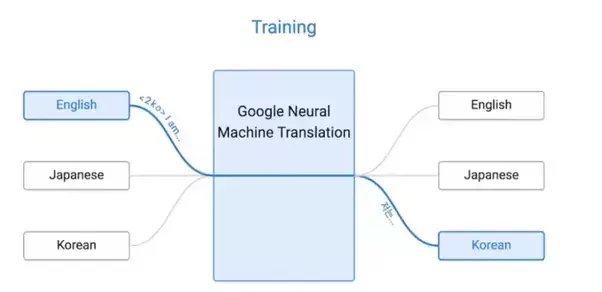

Zero-shot translation
The GNMT system is said to represent an improvement over the former Google Translate in that it can handle "zero-shot translation", that is it directly translates one language into another (for example, Japanese to Korean).[2] Google Translate previously first translated the source language into English and then translated the English into the target language rather than translating directly from one language to another.[4]

## Model consists of a deep LSTM network with 8 encoder and 8 decoder layers using residual connections as well as attention connections from the decoder network to the encoder.

By using a single model to translate between any two languages, the model is forced to learn universal features common to all languages. This enables the system to do “Zero-Shot Translation”: the model is able to translate between a language pair for which it hasn’t explicitly seen any training data. In the case of English, Japanese and Korean, a model trained to translate between English⇄Korean and English⇄Japanese is also able to translate between Korean⇄Japanese without any explicit supervised training.
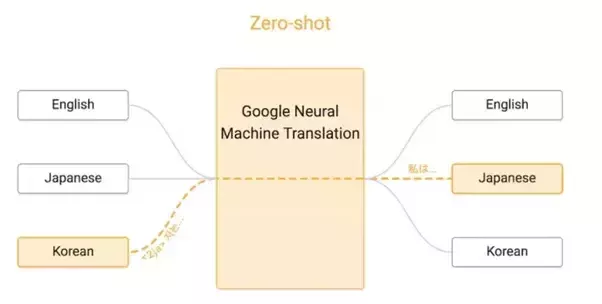

https://research.googleblog.com/2016/11/zero-shot-translation-with-googles.html

https://arxiv.org/pdf/1611.04558.pdf

<a id='metric'></a>

## 9) Evaluation metics and loss function for Language translation model:
	Automatic evaluation
1	BLEU

2	NIST

3	Word error rate

4	METEOR

5	LEPOR

Most commonly used metric is the BLEU score, it stands for  (bilingual evaluation understudy).

BLEU was one of the first metrics to report high correlation with human judgments of quality. The metric is currently one of the most popular in the field. The central idea behind the metric is that "the closer a machine translation is to a professional human translation, the better it is". The metric calculates scores for individual segments, generally sentences—then averages these scores over the whole corpus for a final score. It has been shown to correlate highly with human judgments of quality at the corpus level.

BLEU uses a modified form of precision to compare a candidate translation against multiple reference translations. The metric modifies simple precision since machine translation systems have been known to generate more words than appear in a reference text. No other machine translation metric is yet to significantly outperform BLEU with respect to correlation with human judgment across language pairs.

<h2>BLEU’s evaluation system requires two inputs: 
<li>
 a numerical translation closeness metric, which is then assigned and measured against 
</li>
<li>
 a corpus of human reference translations.
</li>
</h2>

Loss is the categorical cross entropy loss.

## Time taken to train On WMT En→Fr, the training set contains 36M sentence pairs
### ---On WMT En→Fr, it takes around 6 days to train a basic model using 96 NVIDIA K80 GPUs.




Attention is all you need paper on using attention mechanism on seq2seq models

https://arxiv.org/pdf/1706.03762.pdf

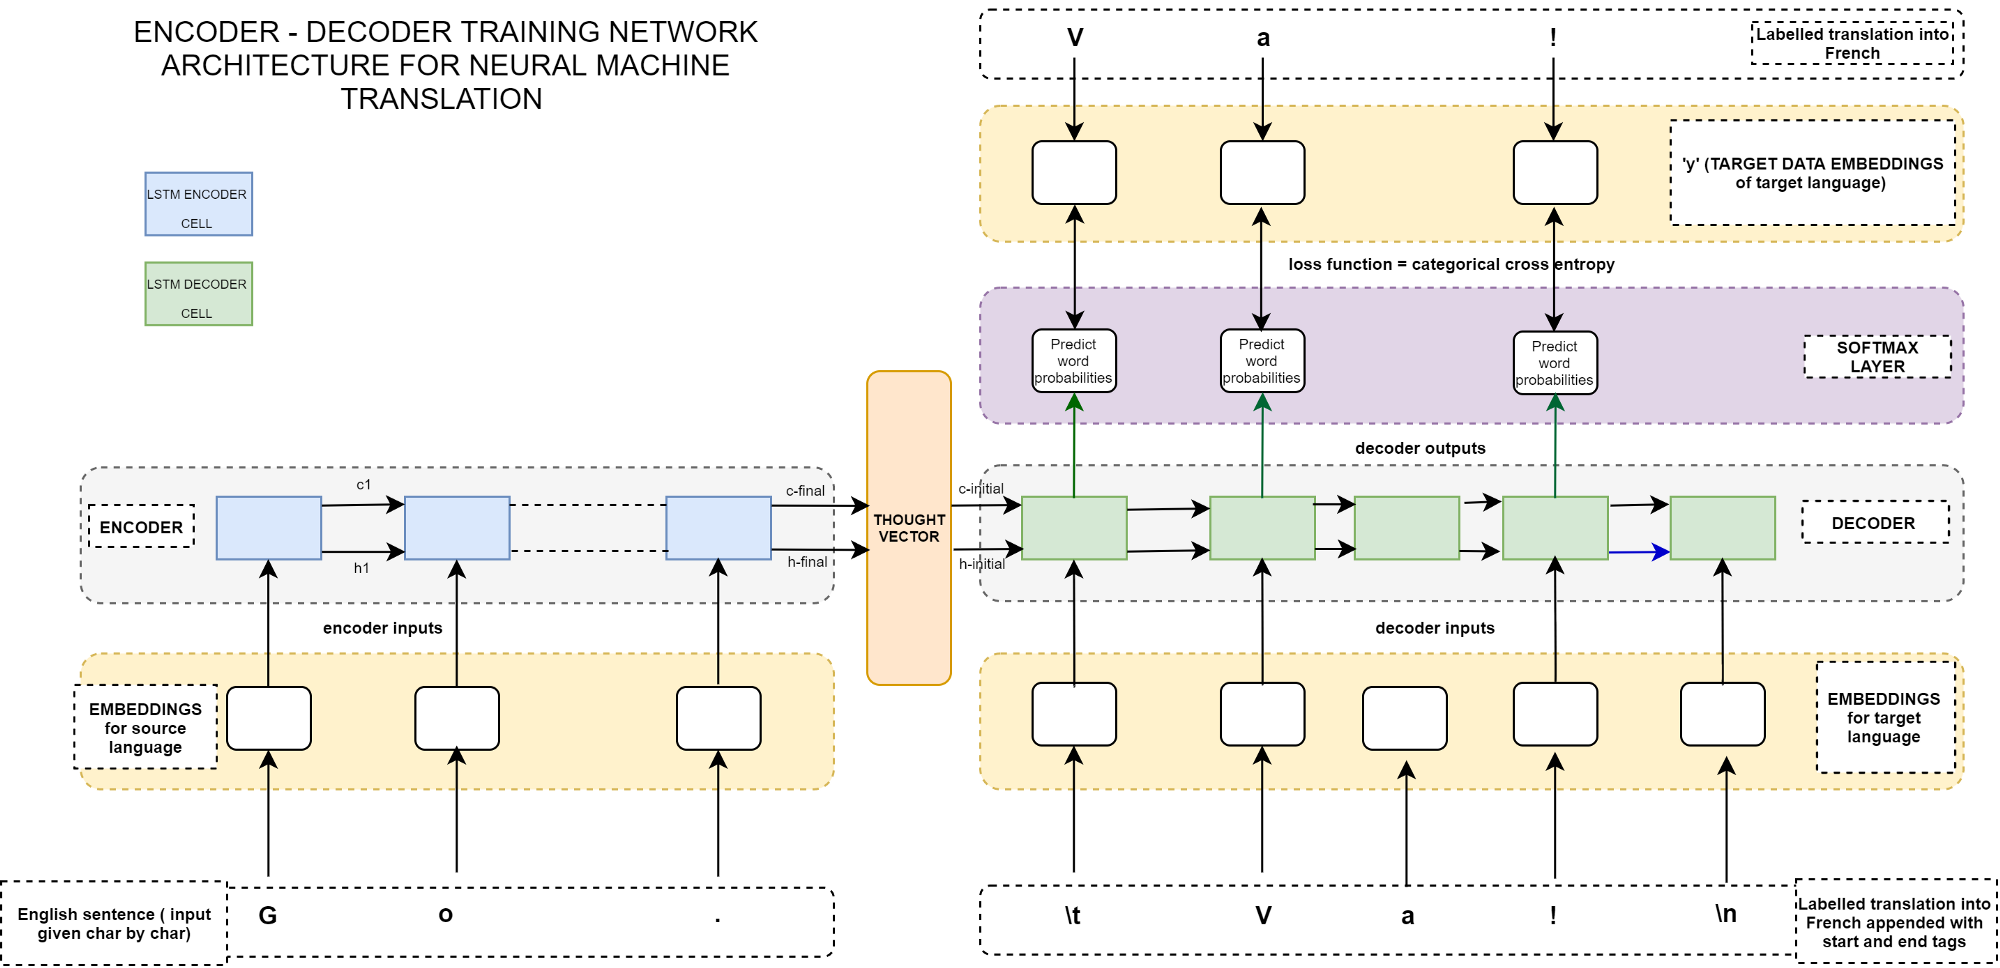

## Google neural machine translator architecture:
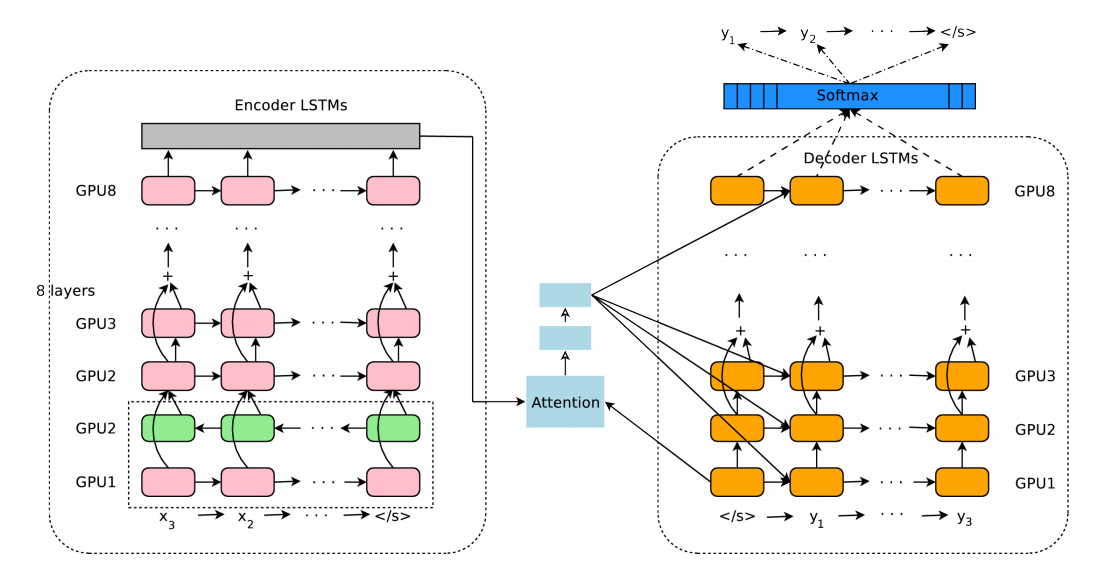